In [1]:
#Import all required modules
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [2]:
#Import data from CSV file and create a dataframe
def create_dataframe(filename):
    #Read file into a pandas dataframe
    df = pd.read_csv(filename)
    #Remove white space in column names
    df.columns = [c.replace(' ', '_') for c in df.columns]
    return df

In [3]:
#Create dataframes for both training and testing sets
train_df_tmp = create_dataframe('train_stances.csv')
test_df_tmp = create_dataframe('competition_test_stances.csv')
train_bodies_df = create_dataframe('train_bodies.csv')
test_bodies_df = create_dataframe('test_bodies.csv')

train_df_tmp.head(5)

,Headline,Body_ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [4]:
train_df = pd.merge(train_df_tmp,
                 train_bodies_df[['Body_ID', 'articleBody']])

test_df = pd.merge(test_df_tmp,
                 test_bodies_df[['Body_ID', 'articleBody']])

train_df = train_df.rename(columns={'articleBody': 'Body_Text'})
test_df = test_df.rename(columns={'articleBody': 'Body_Text'})

In [5]:
train_df = train_df[['Headline','Body_Text','Stance']]

In [6]:
train_df.groupby('Stance').describe()

Body_Text                                                            \
              count unique                                                top   
Stance                                                                          
agree          3678    828  President Obama said Wednesday that the United...   
disagree        840    291  There's a story currently making the rounds ab...   
discuss        8909   1280  Islamic State militants appear to have killed ...   
unrelated     36545   1051  The man who jumped the White House fence this ...   

               Headline         \
          freq    count unique   
Stance                           
agree       24     3678    933   
disagree    14      840    285   
discuss     49     8909   1305   
unrelated  175    36545   1648   

                                                                   
                                                         top freq  
Stance                                                             
agree      James Foley remembered as 'brave and tireless'...   19  
disagree   Batmobile Stolen From "Batman v Superman: Dawn...   12  
discuss    Islamic State releases video apparently showin...   50  
unrelated  Government fires employee who skipped work for...   96

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
train_df['length'] = train_df['Body_Text'].apply(len)

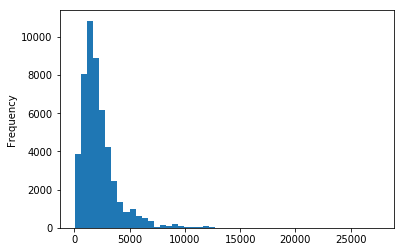

In [9]:
train_df['length'].plot.hist(bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ae18a8780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4ad9f2b358>]], dtype=object)

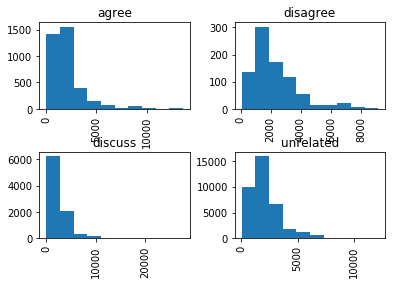

In [10]:
train_df.hist(column='length',by='Stance')